In [3]:
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# https://www.kaggle.com/datasets/jsrojas/labeled-network-traffic-flows-114-applications/
df = pd.read_csv("./network-dataset.csv")

In [5]:
df

,flow_key,src_ip_numeric,src_ip,src_port,dst_ip,dst_port,proto,pktTotalCount,octetTotalCount,min_ps,...,b_flowEnd,b_flowDuration,b_min_piat,b_max_piat,b_avg_piat,b_std_dev_piat,flowEndReason,category,application_protocol,web_service
0,3acee4f4ea001cd5e6d9584d4036b53d,3232266497,192.168.121.1,67,172.16.255.185,67,17,22,7620,328,...,1.555955e+09,1.554399e+12,1.035380e-02,198.657965,51.689181,84.916348,2,Network,Unknown,DHCP
1,974ec5991b439c9a7176b88be0c90df0,3232266497,192.168.121.1,67,172.16.255.186,67,17,17,5670,328,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,2,Network,Unknown,DHCP
2,3acee4f4ea001cd5e6d9584d4036b53d,3232266497,192.168.121.1,67,172.16.255.185,67,17,43,15124,328,...,1.555965e+09,1.554409e+12,2.233195e-02,340.268454,89.927588,124.270745,2,Network,Unknown,DHCP
3,974ec5991b439c9a7176b88be0c90df0,3232266497,192.168.121.1,67,172.16.255.186,67,17,30,10086,328,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,2,Network,Unknown,DHCP
4,cfa7c2740072befaa89c202499729e08,3232266497,192.168.121.1,0,10.130.1.166,0,1,1,56,56,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,2,Network,Unknown,ICMP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2704834,695ea899a18c6d2f90c8b2f6c9b70bdf,3232268540,192.168.128.252,137,172.16.255.186,137,17,9,702,78,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,2,System,Unknown,NetBIOS
2704835,f8188e4364129e635fe032a3bda206ea,3232268540,192.168.128.252,138,172.16.255.185,138,17,3,687,229,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,2,System,Unknown,NetBIOS
2704836,4deda0130e2054781655cb4bd4cb580d,3232268540,192.168.128.252,138,172.16.255.186,138,17,3,687,229,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,2,System,Unknown,NetBIOS
2704837,8c07a45c0c48648ff56341d7a065b855,3232268540,192.168.128.252,49879,108.177.11.188,5228,6,75,3520,40,...,1.559771e+09,1.558211e+12,1.150203e-02,90.155711,44.999017,14.822745,2,Web,Unknown,Google


In [6]:
df.shape

(2704839, 50)

In [7]:
df.columns

Index(['flow_key', 'src_ip_numeric', 'src_ip', 'src_port', 'dst_ip',
       'dst_port', 'proto', 'pktTotalCount', 'octetTotalCount', 'min_ps',
       'max_ps', 'avg_ps', 'std_dev_ps', 'flowStart', 'flowEnd',
       'flowDuration', 'min_piat', 'max_piat', 'avg_piat', 'std_dev_piat',
       'f_pktTotalCount', 'f_octetTotalCount', 'f_min_ps', 'f_max_ps',
       'f_avg_ps', 'f_std_dev_ps', 'f_flowStart', 'f_flowEnd',
       'f_flowDuration', 'f_min_piat', 'f_max_piat', 'f_avg_piat',
       'f_std_dev_piat', 'b_pktTotalCount', 'b_octetTotalCount', 'b_min_ps',
       'b_max_ps', 'b_avg_ps', 'b_std_dev_ps', 'b_flowStart', 'b_flowEnd',
       'b_flowDuration', 'b_min_piat', 'b_max_piat', 'b_avg_piat',
       'b_std_dev_piat', 'flowEndReason', 'category', 'application_protocol',
       'web_service'],
      dtype='object')

# 단일변량
### 1가지 변수에 대한 값들의 개수 확인

In [8]:
df['proto'].value_counts(ascending=True)

1        7503
17    1188726
6     1508610
Name: proto, dtype: int64

### 1가지 변수에 대해 막대 그래프로 확인
변수의 종류가 많으면 막대 그래프로 확인하기 어려움

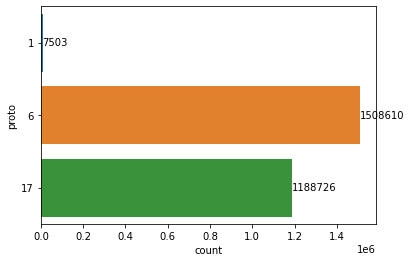

In [9]:
def one_bar_graph(col_name, score=False):
    ax = sns.countplot(y=col_name, data=df)
    if score:
        ax.bar_label(ax.containers[0], fmt='%.f')

one_bar_graph('proto', True)

### 1가지 변수에 대해 밀도 함수로 분포 확인 (숫자형만 가능)

<AxesSubplot:xlabel='proto', ylabel='Density'>

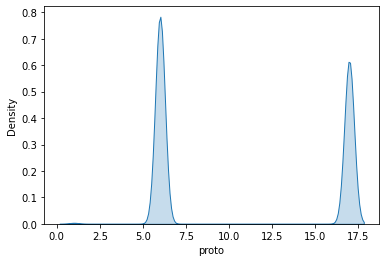

In [10]:
sns.kdeplot(data=df['proto'], fill=True)

In [11]:
# 'src_ip'와 'src_ip_numeric'이라는 변수가 있는데, 어떻게 차이나는지 'src_ip'값을 int로 수정하여 밀도 비교
#(IP의 분포를 확인하고 싶으실때 참고하세요.)

def convert_ip(ip_address):
    result = ''
    blocks = ip_address.split(".")
    for block in blocks:
        if (int(block)/10) < 1:
            result += '00'
            result += block
        elif (int(block)/100) < 1:
            result += '0'
            result += block
        elif (int(block)/1000) <1:
            result += block
    return result

In [12]:
df['src_ip_num'] = df['src_ip'].apply(convert_ip).astype('int64')
df

,flow_key,src_ip_numeric,src_ip,src_port,dst_ip,dst_port,proto,pktTotalCount,octetTotalCount,min_ps,...,b_flowDuration,b_min_piat,b_max_piat,b_avg_piat,b_std_dev_piat,flowEndReason,category,application_protocol,web_service,src_ip_num
0,3acee4f4ea001cd5e6d9584d4036b53d,3232266497,192.168.121.1,67,172.16.255.185,67,17,22,7620,328,...,1.554399e+12,1.035380e-02,198.657965,51.689181,84.916348,2,Network,Unknown,DHCP,192168121001
1,974ec5991b439c9a7176b88be0c90df0,3232266497,192.168.121.1,67,172.16.255.186,67,17,17,5670,328,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,2,Network,Unknown,DHCP,192168121001
2,3acee4f4ea001cd5e6d9584d4036b53d,3232266497,192.168.121.1,67,172.16.255.185,67,17,43,15124,328,...,1.554409e+12,2.233195e-02,340.268454,89.927588,124.270745,2,Network,Unknown,DHCP,192168121001
3,974ec5991b439c9a7176b88be0c90df0,3232266497,192.168.121.1,67,172.16.255.186,67,17,30,10086,328,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,2,Network,Unknown,DHCP,192168121001
4,cfa7c2740072befaa89c202499729e08,3232266497,192.168.121.1,0,10.130.1.166,0,1,1,56,56,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,2,Network,Unknown,ICMP,192168121001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2704834,695ea899a18c6d2f90c8b2f6c9b70bdf,3232268540,192.168.128.252,137,172.16.255.186,137,17,9,702,78,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,2,System,Unknown,NetBIOS,192168128252
2704835,f8188e4364129e635fe032a3bda206ea,3232268540,192.168.128.252,138,172.16.255.185,138,17,3,687,229,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,2,System,Unknown,NetBIOS,192168128252
2704836,4deda0130e2054781655cb4bd4cb580d,3232268540,192.168.128.252,138,172.16.255.186,138,17,3,687,229,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,2,System,Unknown,NetBIOS,192168128252
2704837,8c07a45c0c48648ff56341d7a065b855,3232268540,192.168.128.252,49879,108.177.11.188,5228,6,75,3520,40,...,1.558211e+12,1.150203e-02,90.155711,44.999017,14.822745,2,Web,Unknown,Google,192168128252


<AxesSubplot:xlabel='src_ip_num', ylabel='Density'>

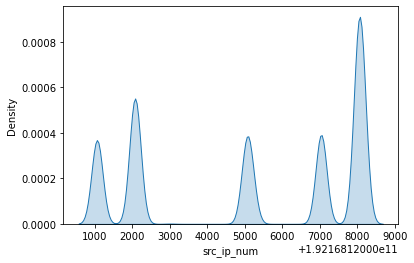

In [13]:
sns.kdeplot(data=df['src_ip_num'], fill=True)

<AxesSubplot:xlabel='src_ip_numeric', ylabel='Density'>

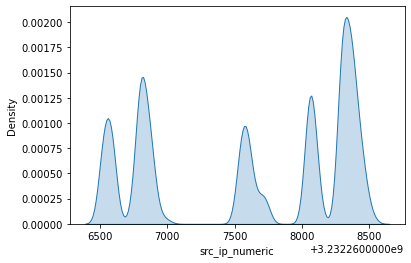

In [14]:
sns.kdeplot(data=df['src_ip_numeric'], fill=True)

In [15]:
# 거의 비슷한 분포를 가지지만 약간 다름, 아마 데이터 처리 과정에서 달라진 것으로 추정

### IQR 확인 (숫자형만 가능)

[Text(0.5, 1.0, 'proto')]

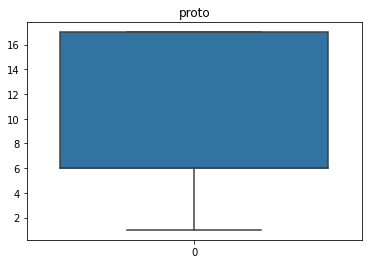

In [16]:
var_name = 'proto'
sns.boxplot(data=df[var_name]).set(title=var_name)

[Text(0.5, 1.0, 'src_ip_num')]

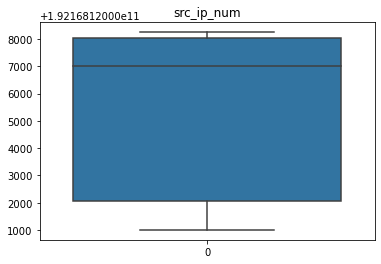

In [17]:
var_name = 'src_ip_num'
sns.boxplot(data=df[var_name]).set(title=var_name)

[Text(0.5, 1.0, 'octetTotalCount')]

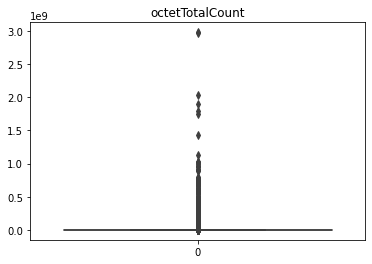

In [18]:
var_name = 'octetTotalCount'
sns.boxplot(data=df[var_name]).set(title=var_name)

# 다변량
### 2개씩 Scatter plot으로 분포 확인
숫자형/문자형 모두 표현이 가능하지만, 문자형의 경우 선형 관계로 보기는 어려움

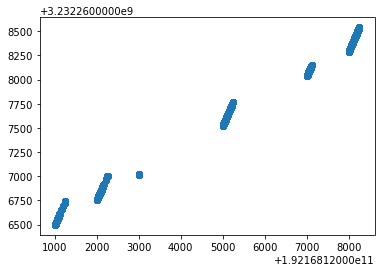

In [19]:
var1 = 'src_ip_num'
var2 = 'src_ip_numeric'
plt.scatter(x=df[var1], y=df[var2], alpha=0.2) #edgecolors='black'

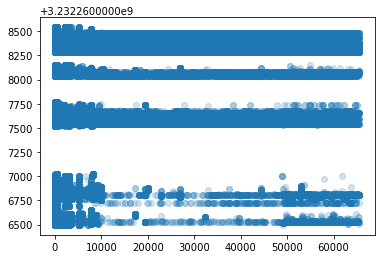

In [20]:
var1 = 'dst_port'
var2 = 'src_ip_numeric'
plt.scatter(x=df[var1], y=df[var2], alpha=0.2) #edgecolors='black'

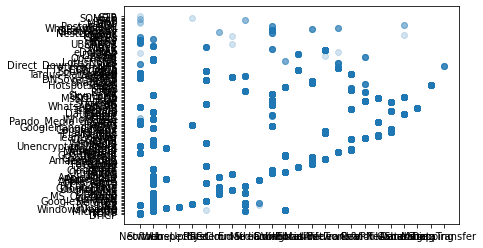

In [21]:
var1 = 'category'
var2 = 'web_service'
plt.scatter(x=df[var1], y=df[var2], alpha=0.2) #edgecolors='black'

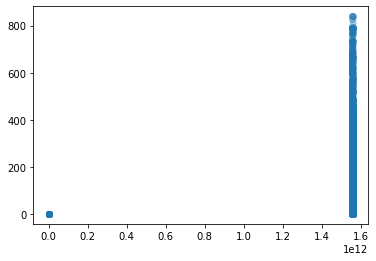

In [22]:
var1 = 'b_flowDuration'
var2 = 'b_std_dev_piat'
plt.scatter(x=df[var1], y=df[var2], alpha=0.2) #edgecolors='black'

### correlation matrix (숫자형만 가능)

In [23]:
# 문자형 변수 제거
## 형식은 문자이지만 숫자인 경우도 있을 수 있으므로, 눈으로 확인하고 제거하는게 좋음

In [24]:
df2 = df.copy()
col_names = df.columns
for col_name in col_names:
    if type(df[col_name].iloc[0]) == str:
        df2 = df2.drop(col_name, axis=1)
df2

,src_ip_numeric,src_port,dst_port,proto,pktTotalCount,octetTotalCount,min_ps,max_ps,avg_ps,std_dev_ps,...,b_std_dev_ps,b_flowStart,b_flowEnd,b_flowDuration,b_min_piat,b_max_piat,b_avg_piat,b_std_dev_piat,flowEndReason,src_ip_num
0,3232266497,67,67,17,22,7620,328,394,346.363636,25.010081,...,2.000000,1.555955e+09,1.555955e+09,1.554399e+12,1.035380e-02,198.657965,51.689181,84.916348,2,192168121001
1,3232266497,67,67,17,17,5670,328,354,333.529412,9.140200,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,2,192168121001
2,3232266497,67,67,17,43,15124,328,394,351.720930,26.098495,...,1.332347,1.555964e+09,1.555965e+09,1.554409e+12,2.233195e-02,340.268454,89.927588,124.270745,2,192168121001
3,3232266497,67,67,17,30,10086,328,352,336.200000,10.057833,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,2,192168121001
4,3232266497,0,0,1,1,56,56,56,56.000000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,2,192168121001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2704834,3232268540,137,137,17,9,702,78,78,78.000000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,2,192168128252
2704835,3232268540,138,138,17,3,687,229,229,229.000000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,2,192168128252
2704836,3232268540,138,138,17,3,687,229,229,229.000000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,2,192168128252
2704837,3232268540,49879,5228,6,75,3520,40,66,46.933333,6.685972,...,4.228907,1.559770e+09,1.559771e+09,1.558211e+12,1.150203e-02,90.155711,44.999017,14.822745,2,192168128252


In [25]:
df_corr = df2.corr()
df_corr

,src_ip_numeric,src_port,dst_port,proto,pktTotalCount,octetTotalCount,min_ps,max_ps,avg_ps,std_dev_ps,...,b_std_dev_ps,b_flowStart,b_flowEnd,b_flowDuration,b_min_piat,b_max_piat,b_avg_piat,b_std_dev_piat,flowEndReason,src_ip_num
src_ip_numeric,1.000000,-0.066928,0.144414,0.011638,0.000946,-0.000275,0.023454,-0.056205,-0.047466,-0.054720,...,-0.045641,-0.084750,-0.084750,-0.017493,0.005855,0.012903,0.007364,0.010898,-0.001771,0.998581
src_port,-0.066928,1.000000,-0.131379,-0.051601,-0.004489,-0.003244,-0.096479,0.027588,0.036652,0.042074,...,0.032093,0.173325,0.173325,0.034662,-0.017114,-0.038136,-0.024979,-0.031208,0.049090,-0.069177
dst_port,0.144414,-0.131379,1.000000,-0.009039,0.006036,0.002549,0.028789,-0.076972,-0.085995,-0.095745,...,-0.088607,-0.298439,-0.298439,-0.125849,0.010548,-0.010977,0.009650,-0.012656,-0.030924,0.144815
proto,0.011638,-0.051601,-0.009039,1.000000,-0.013433,-0.013489,0.270792,-0.303023,-0.185920,-0.338900,...,-0.357752,-0.027094,-0.027094,-0.617269,0.044953,-0.137068,0.005217,-0.170547,-0.639613,0.008905
pktTotalCount,0.000946,-0.004489,0.006036,-0.013433,1.000000,0.922037,-0.005572,0.102519,0.066656,0.048822,...,0.034043,0.008931,0.008931,0.024818,-0.001185,0.006480,-0.001995,-0.002552,0.004307,0.000893
octetTotalCount,-0.000275,-0.003244,0.002549,-0.013489,0.922037,1.000000,-0.005046,0.113761,0.083780,0.066613,...,0.047365,0.007860,0.007860,0.021386,-0.001054,0.004956,-0.002060,-0.003575,0.004932,-0.000327
min_ps,0.023454,-0.096479,0.028789,0.270792,-0.005572,-0.005046,1.000000,-0.080171,0.092784,-0.115298,...,-0.118683,-0.208893,-0.208893,-0.212366,0.015208,-0.036093,0.005115,-0.046150,-0.195410,0.021885
max_ps,-0.056205,0.027588,-0.076972,-0.303023,0.102519,0.113761,-0.080171,1.000000,0.836642,0.914312,...,0.878130,0.143264,0.143264,0.411181,-0.019711,0.097622,-0.014786,0.059138,0.208385,-0.055941
avg_ps,-0.047466,0.036652,-0.085995,-0.185920,0.066656,0.083780,0.092784,0.836642,1.000000,0.898611,...,0.805606,0.052623,0.052623,0.359937,-0.017778,0.068057,-0.018736,0.033168,0.141438,-0.047502
std_dev_ps,-0.054720,0.042074,-0.095745,-0.338900,0.048822,0.066613,-0.115298,0.914312,0.898611,1.000000,...,0.963625,0.172730,0.172730,0.492224,-0.023285,0.097175,-0.015110,0.075553,0.249740,-0.054383


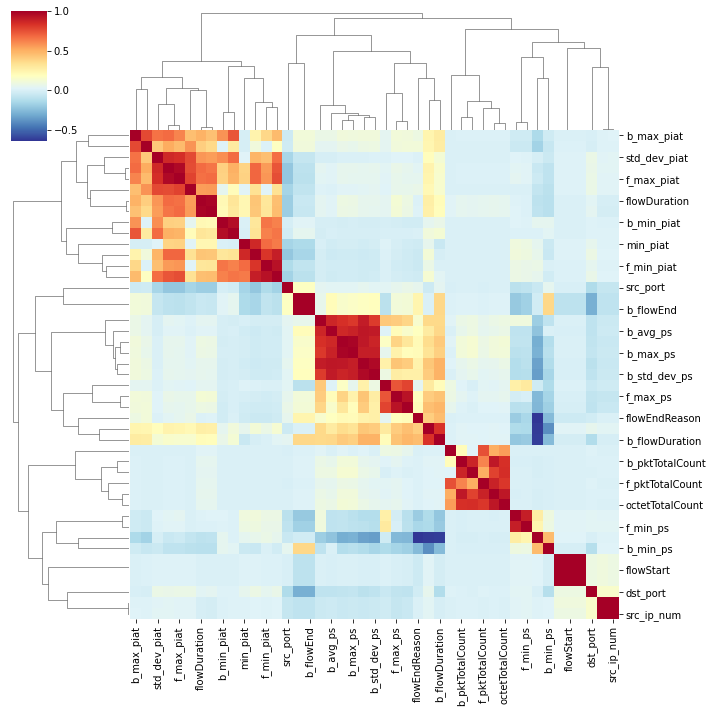

In [29]:
sns.clustermap(df_corr, cmap = 'RdYlBu_r') #annot=True